# Example reduction

In [1]:
import sys
import os
sys.path.append(os.path.expanduser('~/git/LiquidsReflectometer/reduction'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

In [3]:
import mantid
import mantid.simpleapi as api
mantid.kernel.config.setLogLevel(3)

ConfigService-[Error] logging set to PRIO_ERROR priority


In [4]:
print(mantid.__version__)
print(sys.version)

6.3.0
3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:04:10) 
[GCC 10.3.0]


In [28]:
import importlib
from lr_reduction import workflow
from lr_reduction import template
from lr_reduction import output
from lr_reduction import event_reduction

In [90]:
importlib.reload(workflow)
importlib.reload(output)
importlib.reload(event_reduction)

data_dir = os.path.expanduser('~/git/LiquidsReflectometer/reduction/data')
template_path = os.path.join(data_dir, 'template.xml')

for i in range(198409, 198417):
    ws = api.Load("REF_L_%s" % i)
    workflow.reduce(ws, template_path, output_dir=data_dir, pre_cut=1, post_cut=1, average_overlap=False)

wl=15; ths=0.610382; offset=0.01
wl=12.386; ths=0.610058; offset=0.01
wl=9.74; ths=0.610058; offset=0.01
wl=7.043; ths=0.609896; offset=0.01
wl=4.25; ths=0.609733; offset=0.01
wl=4.25; ths=1.19271; offset=0.01
wl=4.25; ths=2.35284; offset=0.01
wl=4.25; ths=4.64906; offset=0.01


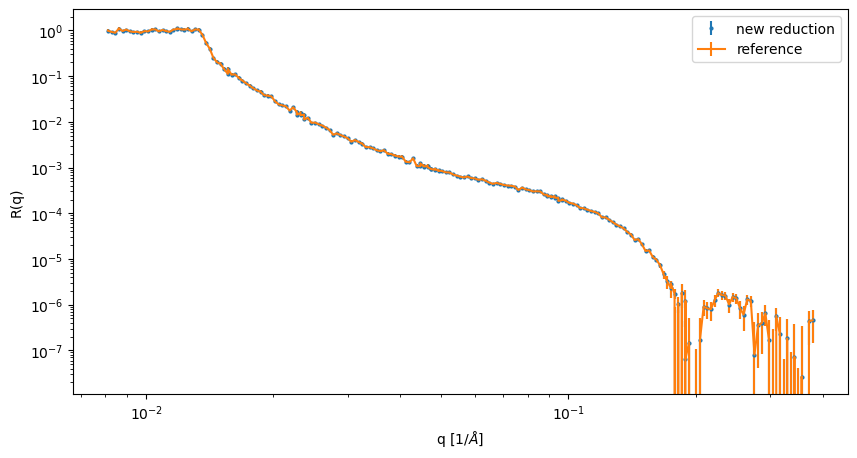

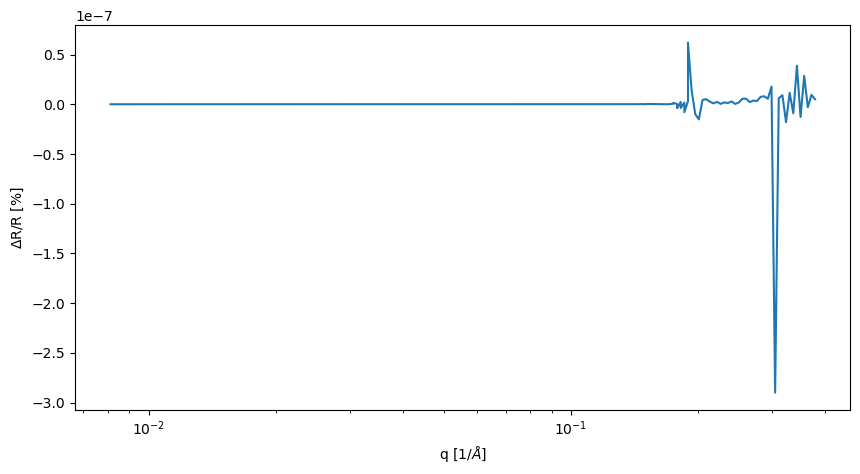

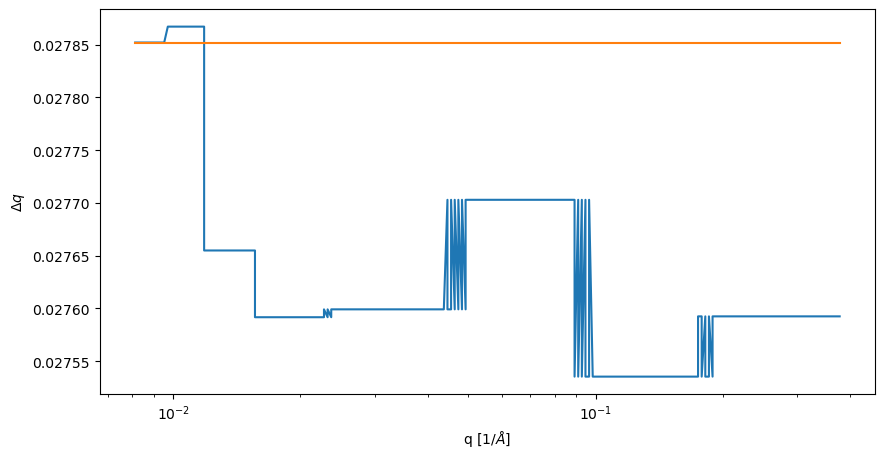

-4.0766001685454967e-16
-1.067751654449303e-15
4.8503382960826983e-17
0.0052853337944813086


In [91]:
reduced_path = os.path.join(data_dir, 'reference_rq.txt')
if os.path.isfile(reduced_path):
    _data = np.loadtxt(reduced_path).T

reduced_path = os.path.join(data_dir, 'REFL_198409_combined_data_auto.txt')
if os.path.isfile(reduced_path):
    _refl = np.loadtxt(reduced_path).T

fig, ax = plt.subplots(figsize=(10,5))
plt.errorbar(_refl[0], _refl[1], yerr=_refl[2], markersize=4, marker='.', linestyle='', label='new reduction')
plt.errorbar(_data[0], _data[1], yerr=_data[2], markersize=4, marker='', linestyle='-', label='reference')

plt.legend()
plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

if len(_data[1])==len(_refl[1]):
    delta = np.fabs(_data[1]-_refl[1])/_refl[1]*100
    fig, ax = plt.subplots(figsize=(10,5))
    plt.plot(_refl[0], delta)

    plt.xlabel('q [$1/\AA$]')
    plt.ylabel('$\Delta$R/R [%]')
    ax.set_yscale('linear')
    ax.set_xscale('log')
    plt.show()

    # dQ is computed for each run in the new implementation
    fig, ax = plt.subplots(figsize=(10,5))
    plt.plot(_refl[0], _refl[3]/_refl[0], label="new_reduction")
    plt.plot(_data[0], _data[3]/_data[0], label="reference")

    plt.xlabel('q [$1/\AA$]')
    plt.ylabel('$\Delta q$')
    ax.set_yscale('linear')
    ax.set_xscale('log')
    plt.show()
else:
    print("len(ref) = %s; len(new) = %s" % (len(_data[1]), len(_refl[1])))

for i in range(4):
    print(np.sum(_data[i]-_refl[i]))
